In [ ]:
#Reference: SimpleITK documentation: https://simpleitk.readthedocs.io/en/master/

In [1]:
import SimpleITK as sitk
from downloaddata import fetch_data as fdata
%matplotlib notebook
import gui
import registration_gui as rgui

import numpy as np
import os
OUTPUT_DIR = 'output'

<IPython.core.display.Javascript object>


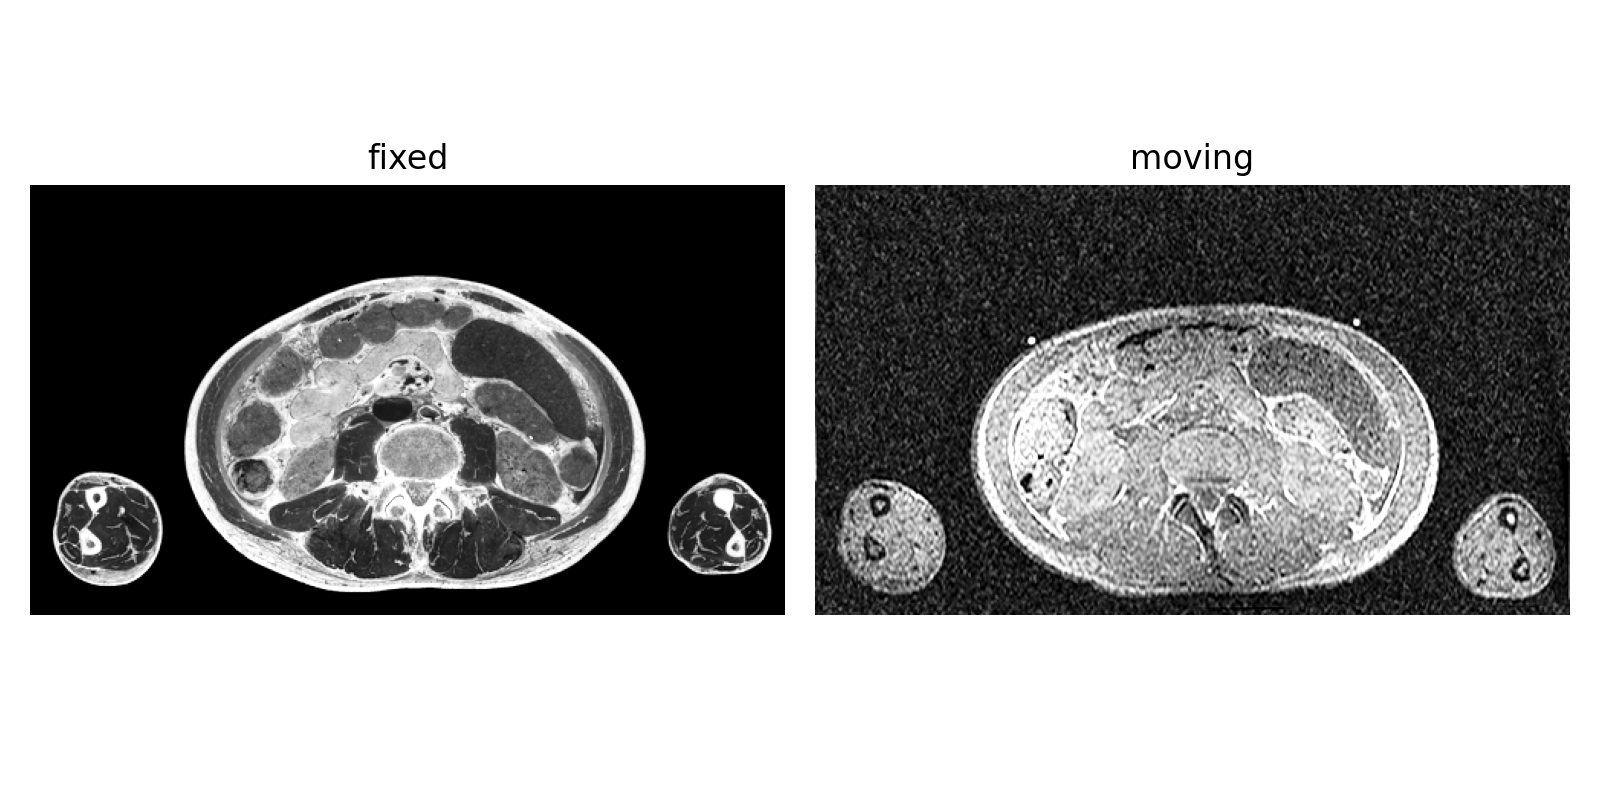

In [15]:
fixed_image =  sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/cryocleaned_abdomen_padded.mhd", sitk.sitkFloat32)
#moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/CT_abdomen.mhd", sitk.sitkFloat32)
moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/MRI_abdomen.mhd", sitk.sitkFloat32)

ct_window_level = [835,162]
mr_window_level = [1036,520]

gui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   
                      title_list = ['fixed', 'moving'], figure_size=(8,4), window_level_list=[ct_window_level, mr_window_level]);

<IPython.core.display.Javascript object>


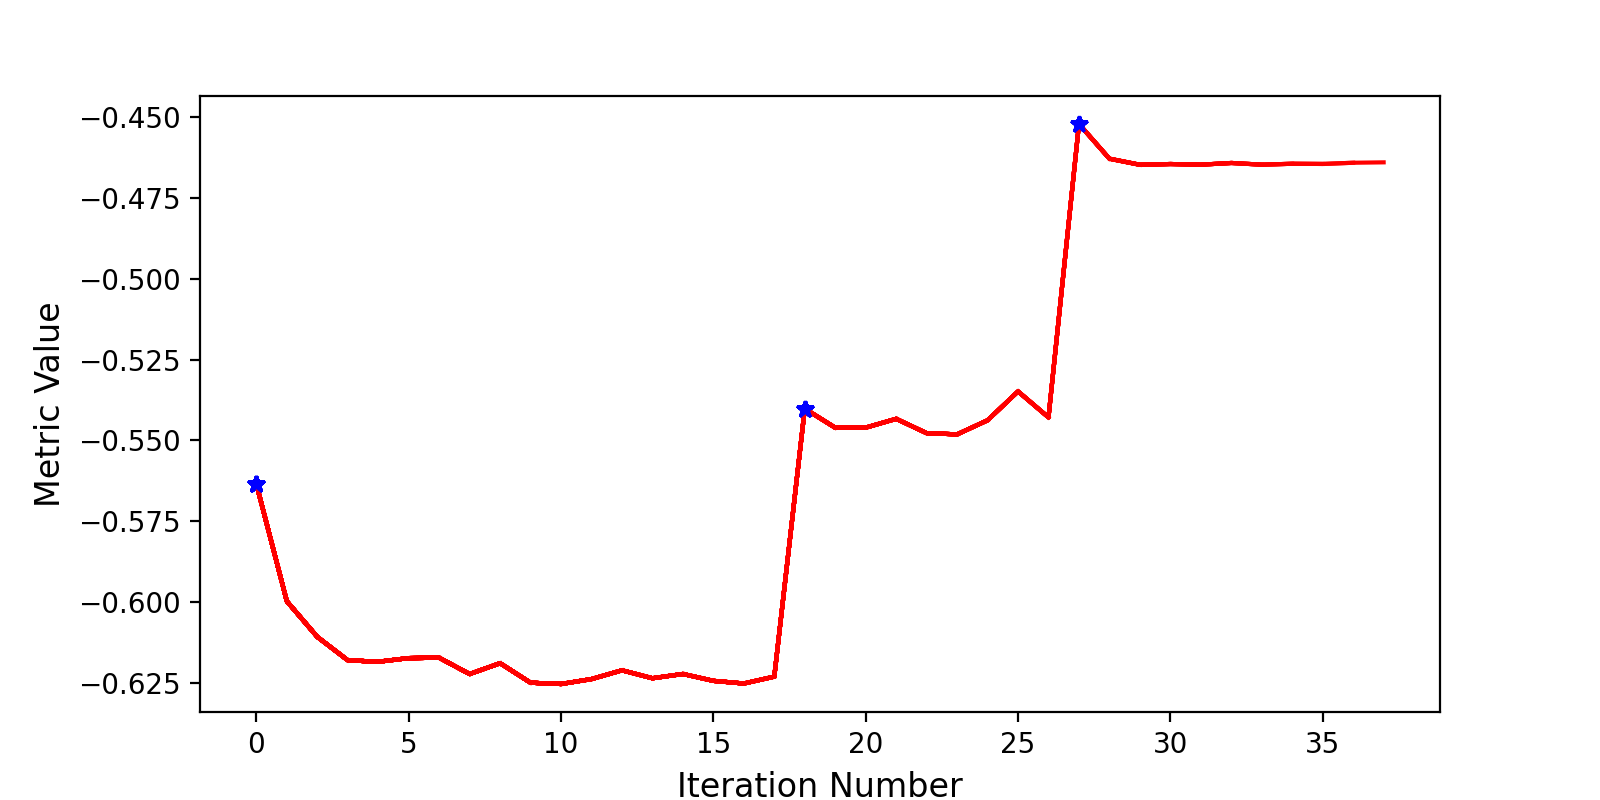

Final metric value: -0.46402962304107437
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.


In [12]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.            
registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, rgui.start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, rgui.end_plot)
registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, rgui.update_multires_iterations) 
registration_method.AddCommand(sitk.sitkIterationEvent, lambda: rgui.plot_values(registration_method))

final_transform = registration_method.Execute(fixed_image, moving_image)

# Always check the reason optimization terminated.
print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

In [16]:
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
sitk.WriteImage(moving_resampled, os.path.join(OUTPUT_DIR, "MRI_small_transformed_SITK1.mhd"))
sitk.WriteTransform(final_transform, os.path.join(OUTPUT_DIR, 'MRI_small__transformed_SITK1.tfm'))

In [13]:
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
simg1 = sitk.Cast(sitk.RescaleIntensity(fixed_image), sitk.sitkUInt8)
#simg1 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
simg2 = sitk.Cast(sitk.RescaleIntensity(moving_resampled), sitk.sitkUInt8)
# Use the // floor division operator so that the pixel type is
# the same for all three images which is the expectation for
# the compose filter.
cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)

<IPython.core.display.Javascript object>


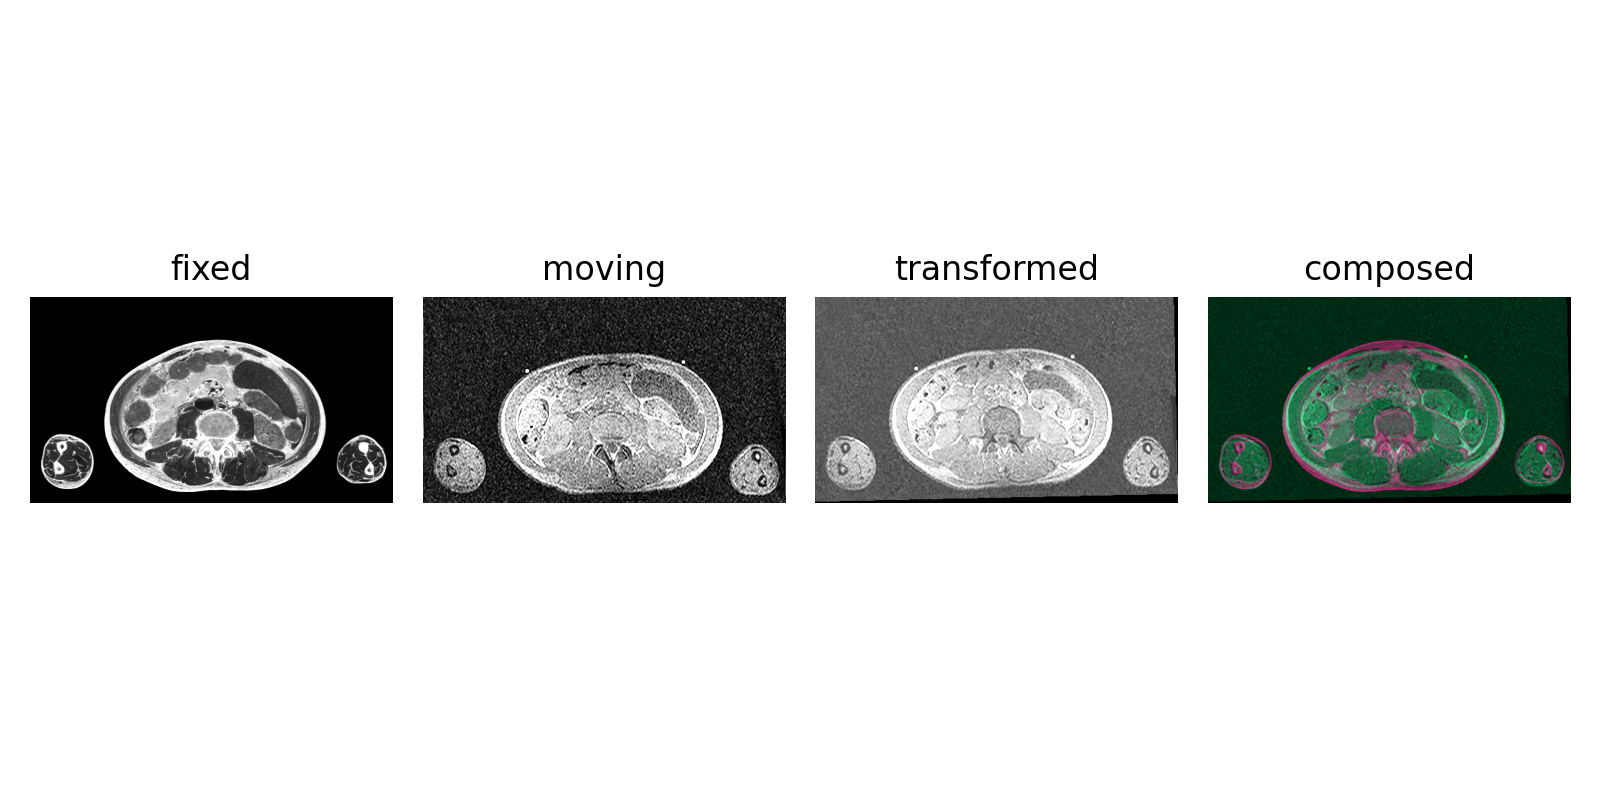

In [14]:
gui.MultiImageDisplay(image_list = [fixed_image, moving_image, moving_resampled, cimg],                   
                      title_list = ['fixed', 'moving', 'transformed','composed'], figure_size=(8,4));

<IPython.core.display.Javascript object>


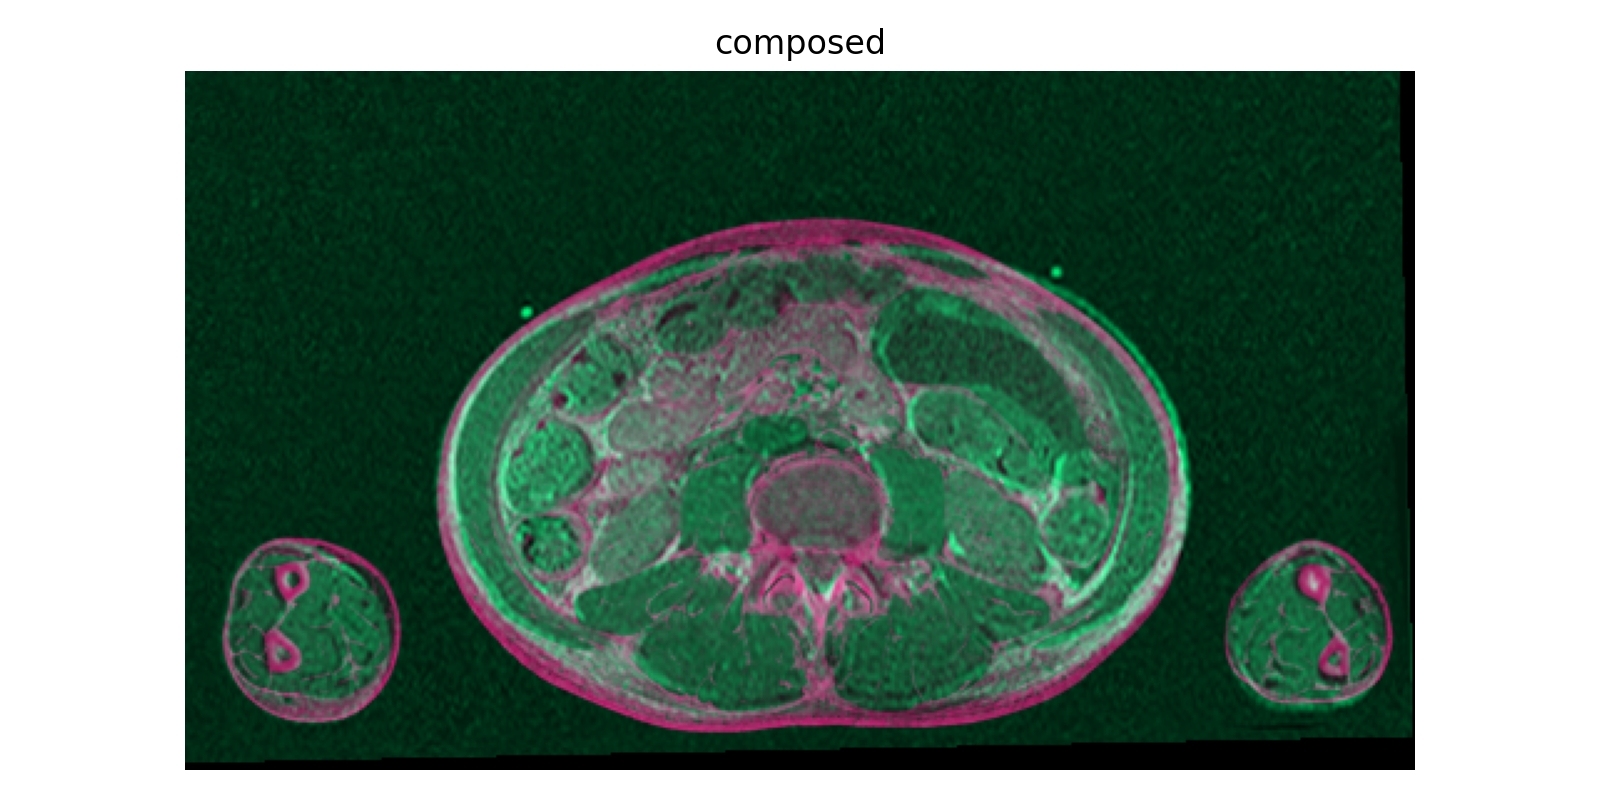

In [15]:
gui.MultiImageDisplay(image_list = [cimg],                   
                      title_list = ['composed'], figure_size=(8,4));

In [5]:
fixed_image =  sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/cryocleaned_abdomen_padded.mhd", sitk.sitkFloat32)
#moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/CT_abdomen.mhd", sitk.sitkFloat32)
moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/CT_abdomen.mhd", sitk.sitkFloat32)
transformed_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/Reg CT rigid MITK mapped moving data.mha", sitk.sitkFloat32)

ct_window_level = [835,162]
mr_window_level = [1036,520]

In [6]:

simg1 = sitk.Cast(sitk.RescaleIntensity(fixed_image), sitk.sitkUInt8)
#simg1 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
simg2 = sitk.Cast(sitk.RescaleIntensity(transformed_image), sitk.sitkUInt8)
# Use the // floor division operator so that the pixel type is
# the same for all three images which is the expectation for
# the compose filter.
cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)

<IPython.core.display.Javascript object>


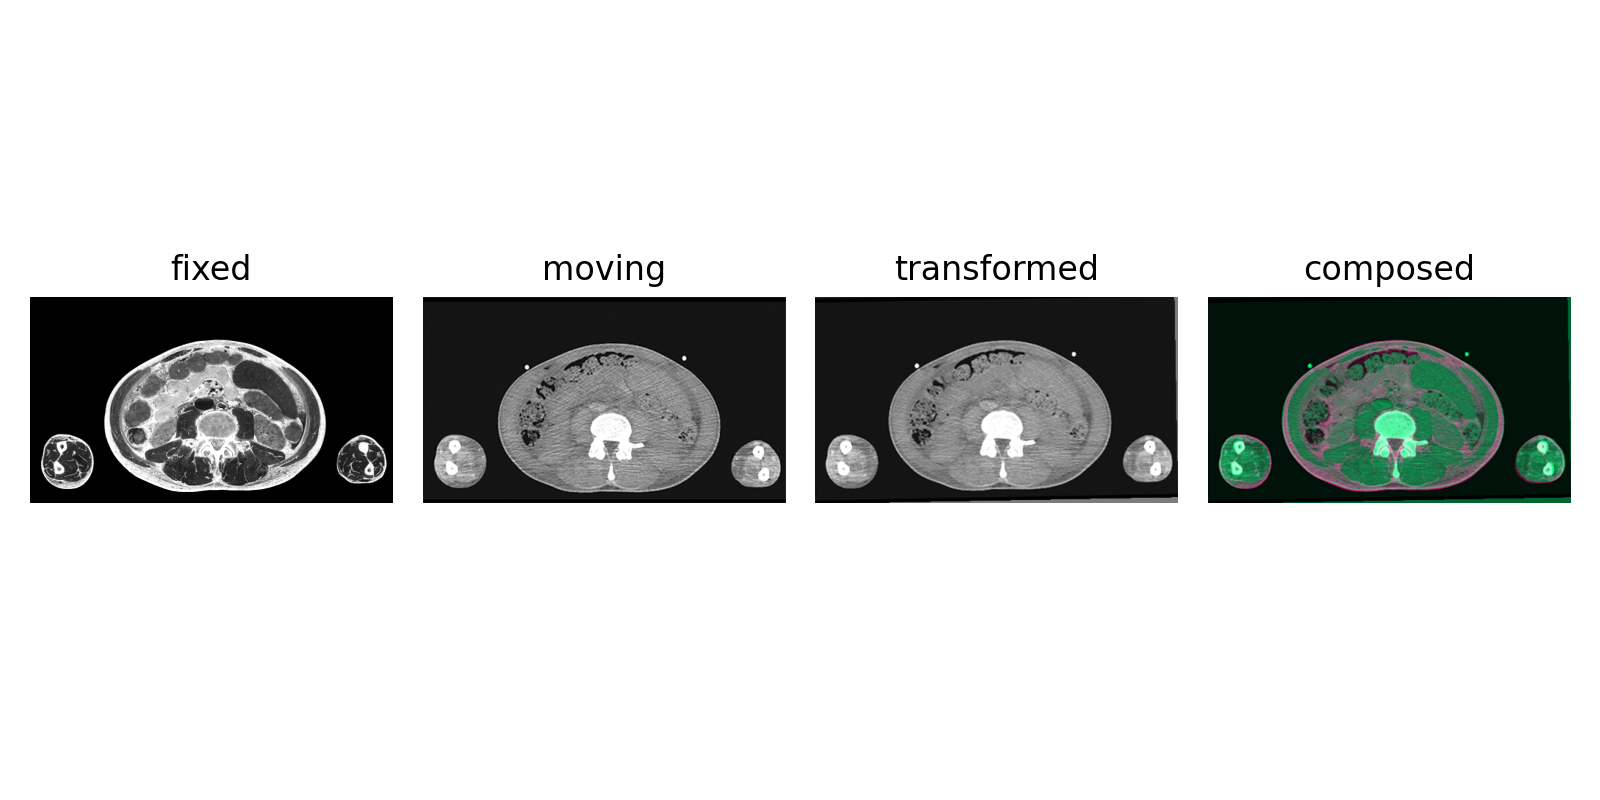

In [7]:
gui.MultiImageDisplay(image_list = [fixed_image, moving_image, transformed_image, cimg],                   
                      title_list = ['fixed', 'moving', 'transformed','composed'], figure_size=(8,4));

<IPython.core.display.Javascript object>


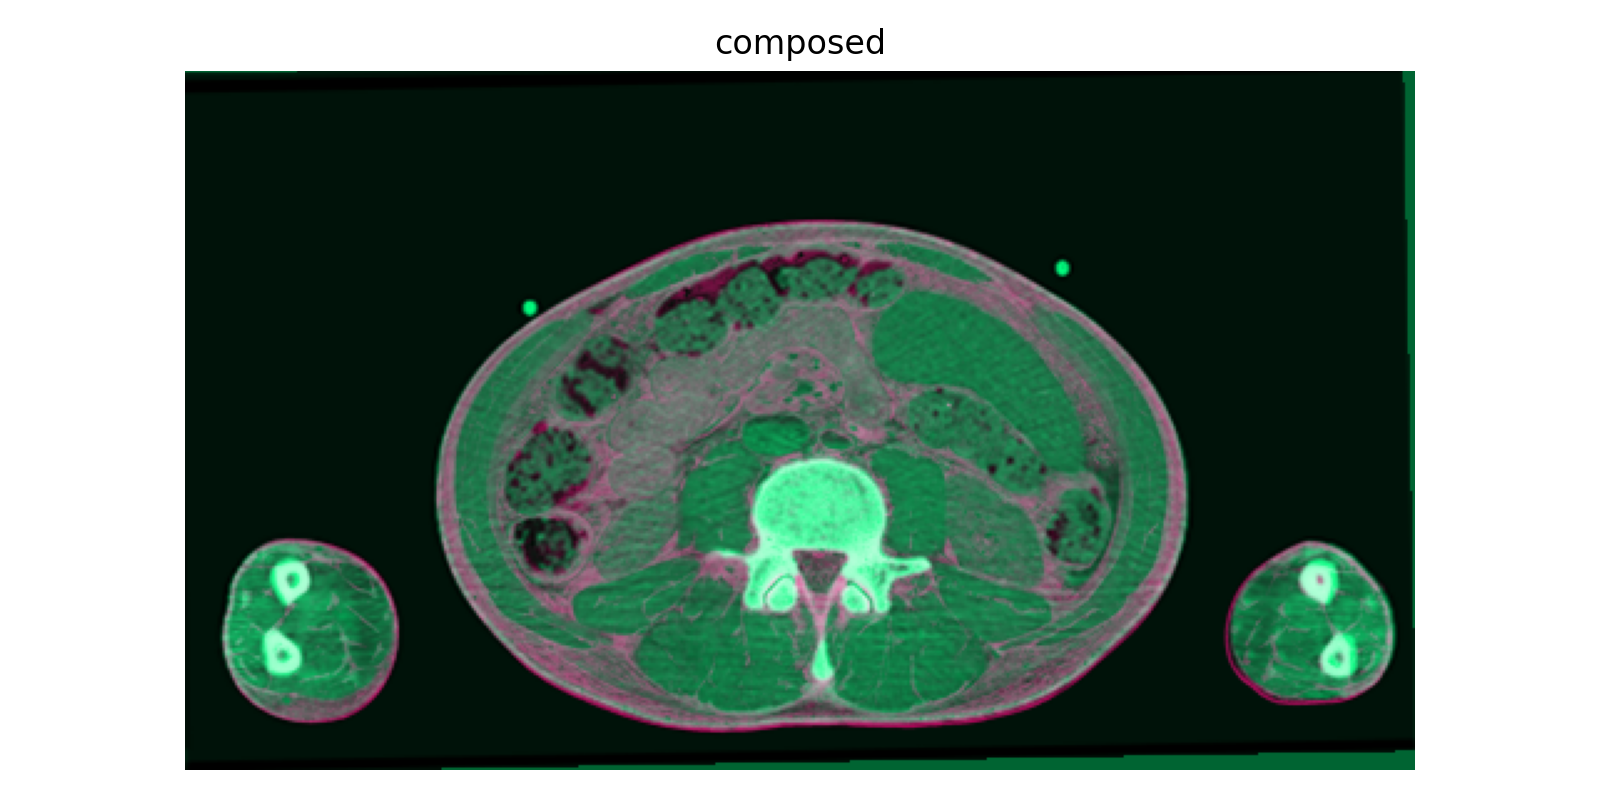

In [8]:
gui.MultiImageDisplay(image_list = [cimg],                   
                      title_list = ['composed'], figure_size=(8,4));